# Two Point Correlation Function

The two-point correlation is widely used as a 'finger print' of porous materials.  For instance, for doing [stochastic reconstructions of porous materials](https://doi.org/10.1006/jcis.2001.8064), the are used in the objective function to minimize the difference between the generated and actual images.

PoreSpy contains two functions for calculating the two-point correlation.  ``two_point_correlation_bf`` uses a brute-force (hence the ``bf``) which overlays a grid on the image, then analyzes the underlying image at the grid points.  ``two_point_correlation_fft`` uses a fast-Fourier transform to perform an autocorrelation of the image with itself, so it's much faster.  The brute-force version is potentially more accurate because the Fourier transform approach introduces some numerical error; however, the slowness of the brute-force method requires applying a limited number of grid points which reduces its accuracy.  As shown below the Fourier transform approach generally produces more acceptable results.

## Import Necessary packages

In [1]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()
np.random.seed(10)

## Generate Artificial Image

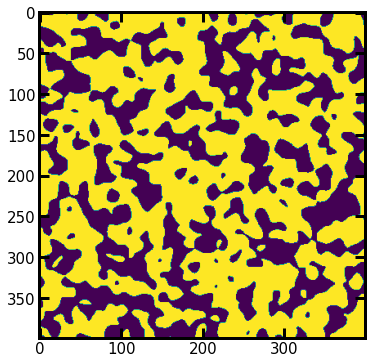

In [2]:
# NBVAL_IGNORE_OUTPUT
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.figure(figsize=[6, 6])
plt.imshow(im)
plt.show()

## Compare Both Approaches

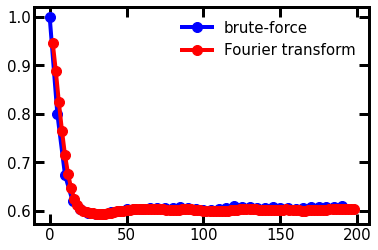

In [3]:
# NBVAL_IGNORE_OUTPUT
plt.figure(figsize=[6, 4])
data = ps.metrics.two_point_correlation_bf(im=im, spacing=5)
plt.plot(*data, 'b-o', label='brute-force')
data = ps.metrics.two_point_correlation_fft(im=im)
plt.plot(*data, 'r-o', label='Fourier transform')
plt.legend()
plt.show()